In [31]:
import glob, os
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import matplotlib as mpl
from astropy import units as u
import time
from astropy.time import Time

In [32]:
import matplotlib as mpl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

In [33]:
models = ['MW', 'LMC', 'SMC']

In [35]:
extbl = ascii.read('../3.table/extinction_law_Pei+92.csv')
#	Correct column name (caused by EXEL program)
extbl['lam_inverse_MW'] = extbl[extbl.keys()[0]]
extbl.remove_column(extbl.keys()[0])
extbl.keys()

#	Put Rv value
extbl['Rv_MW'] = 3.08
extbl['Rv_LMC'] = 3.16
extbl['Rv_SMC'] = 2.93

#	Put Eta value
for mdl in models:
	Rv = extbl[f'Rv_{mdl}'][0]
	E_ratio = extbl[f'E(lam-V)/E(B-V)_{mdl}']
	extbl[f'eta_{mdl}'] = (E_ratio+Rv)/(1+Rv)
	extbl[f'lam_{mdl}'] = 1/extbl[f'lam_inverse_{mdl}']
	extbl[f'nu_{mdl}'] = convert_lam2nu(extbl[f'lam_{mdl}'])

extbl.write('../3.table/extinction_law_Pei+92_modification.csv', format='csv', overwrite=True)
extbl


E(lam-V)/E(B-V)_MW,lam_inverse_LMC,E(lam-V)/E(B-V)_LMC,lam_inverse_SMC,E(lam-V)/E(B-V)_SMC,lam_inverse_MW,Rv_MW,Rv_LMC,Rv_SMC,eta_MW,lam_MW,nu_MW,eta_LMC,lam_LMC,nu_LMC,eta_SMC,lam_SMC,nu_SMC
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-3.02,0.45,-2.92,0.45,-2.61,0.21,3.08,3.16,2.93,0.014705882352941188,4.761904761904762,62956416180000.0,0.057692307692307744,2.2222222222222223,134906606100000.0,0.08142493638676852,2.2222222222222223,134906606100000.0
-2.91,0.61,-2.59,0.61,-2.47,0.29,3.08,3.16,2.93,0.04166666666666665,3.4482758620689657,86939812820000.0,0.13701923076923084,1.639344262295082,182873399380000.0,0.11704834605597964,1.639344262295082,182873399380000.0
-2.76,0.8,-2.22,0.8,-2.12,0.45,3.08,3.16,2.93,0.07843137254901968,2.2222222222222223,134906606100000.0,0.22596153846153844,1.25,239833966400000.0,0.20610687022900764,1.25,239833966400000.0
-2.58,1.82,0.0,1.82,0.0,0.61,3.08,3.16,2.93,0.12254901960784313,1.639344262295082,182873399380000.0,0.7596153846153846,0.5494505494505494,545622273560000.06,0.7455470737913487,0.5494505494505494,545622273560000.06
-2.23,2.27,1.0,2.27,1.0,0.8,3.08,3.16,2.93,0.20833333333333334,1.25,239833966400000.0,1.0,0.44052863436123346,680528879660000.0,1.0,0.44052863436123346,680528879660000.0
-1.6,2.7,1.7,2.7,1.67,1.11,3.08,3.16,2.93,0.3627450980392157,0.9009009009009008,332769628380000.06,1.1682692307692308,0.37037037037037035,809439636600000.0,1.1704834605597962,0.37037037037037035,809439636600000.0
-0.78,2.9,2.06,3.22,2.29,1.43,3.08,3.16,2.93,0.5637254901960784,0.6993006993006994,428703214939999.94,1.2548076923076925,0.3448275862068966,869398128200000.0,1.3282442748091605,0.3105590062111801,965331714760000.1
0.0,3.23,2.66,3.34,2.65,1.82,3.08,3.16,2.93,0.7549019607843137,0.5494505494505494,545622273560000.06,1.3990384615384615,0.30959752321981426,968329639339999.9,1.4198473282442747,0.29940119760479045,1001306809719999.9
1.0,3.33,2.78,3.46,3.0,2.27,3.08,3.16,2.93,1.0,0.44052863436123346,680528879660000.0,1.4278846153846152,0.3003003003003003,998308885140000.0,1.5089058524173027,0.28901734104046245,1037281904679999.9


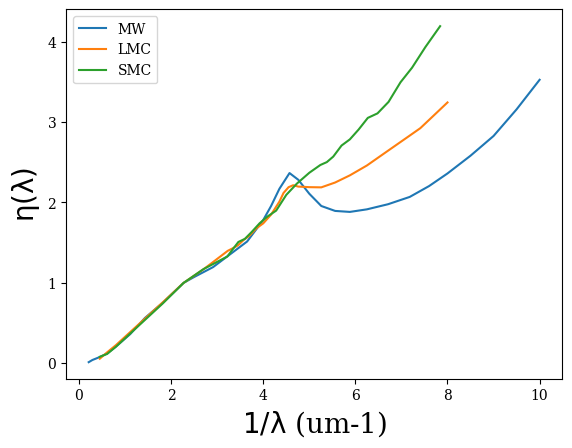

In [36]:
for mdl in models:
	plt.plot(extbl[f'lam_inverse_{mdl}'], extbl[f'eta_{mdl}'], label=mdl)
	plt.xlabel(r'$\rm 1/\lambda$ (um-1)')
	plt.ylabel(r'$\rm \eta(\lambda)$')
	plt.legend()

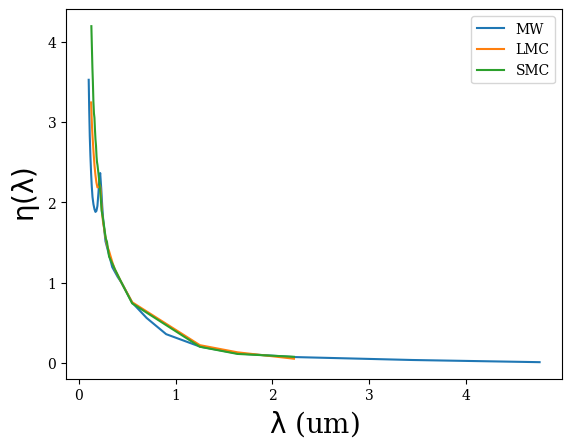

In [37]:
for mdl in models:
	plt.plot(extbl[f'lam_{mdl}'], extbl[f'eta_{mdl}'], label=mdl)
	plt.xlabel(r'$\rm \lambda$ (um)')
	plt.ylabel(r'$\rm \eta(\lambda)$')
	plt.legend()

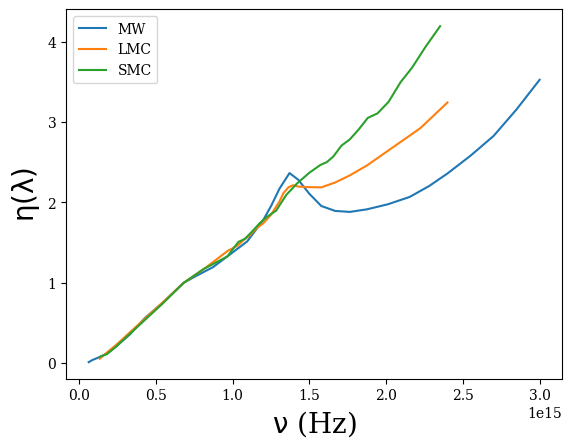

In [38]:
for mdl in models:
	plt.plot(extbl[f'nu_{mdl}'], extbl[f'eta_{mdl}'], label=mdl)
	plt.xlabel(r'$\rm \nu$ (Hz)')
	plt.ylabel(r'$\rm \eta(\lambda)$')
	plt.legend()